In [4]:
%load_ext autoreload
%autoreload 2

from text3d2video.artifacts.video_artifact import VideoArtifact
from IPython.display import Video

video = VideoArtifact.from_wandb_artifact_tag('deadpool-joyful-jump:v0', download=True)
video.ipy_display()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


wandb:   1 of 1 files downloaded.  


In [98]:
frame_nums = video.get_frame_nums()
animation = video.get_animation_from_lineage()
frames = video.get_frames()
frames_3d = animation.load_frames(frame_nums)

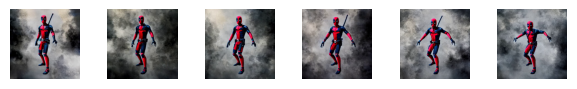

In [99]:
from text3d2video.ipython_utils import display_ims

display_ims(frames)

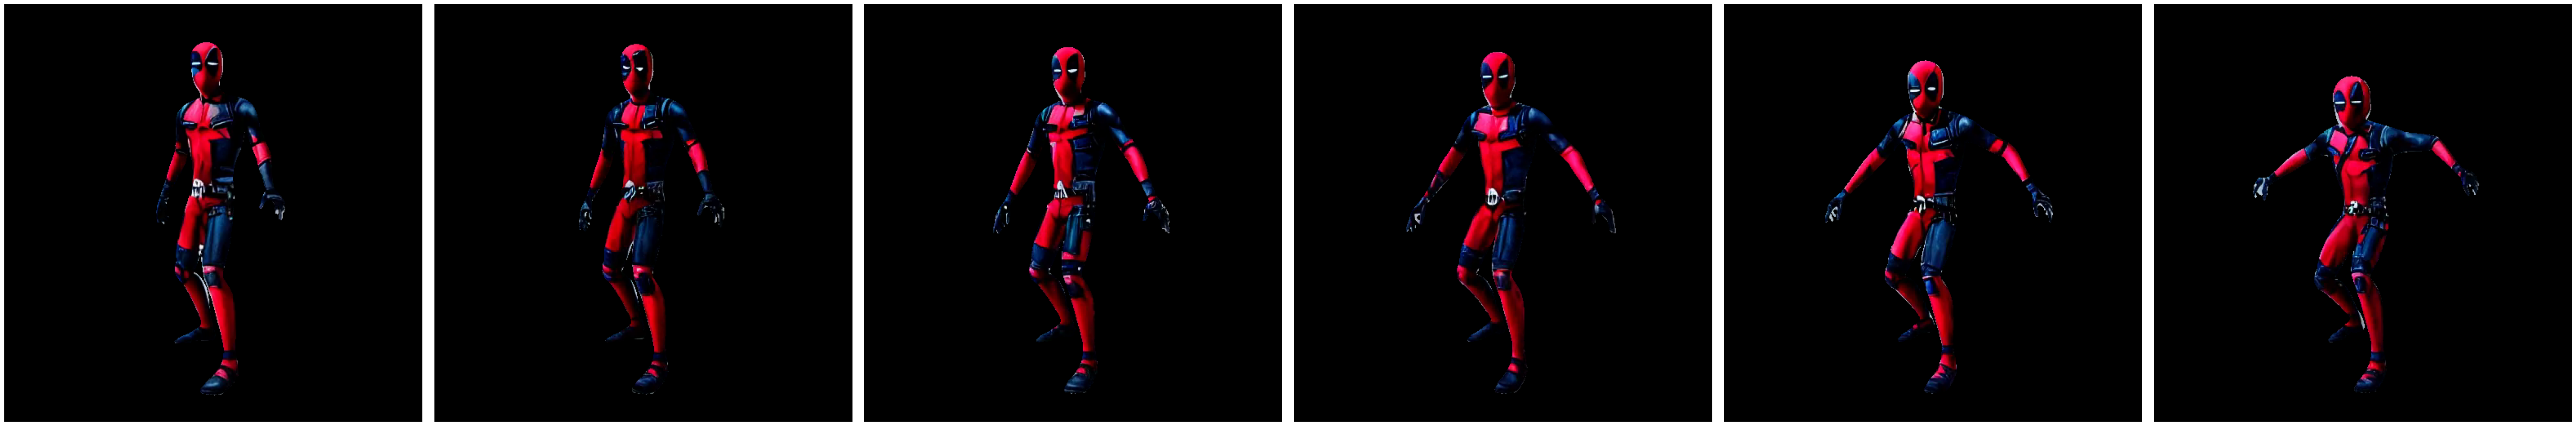

In [108]:
from einops import rearrange
from text3d2video.ipython_utils import display_ims
from text3d2video.rendering import make_rasterizer, render_depth_map
from text3d2video.util import front_camera
import torchvision.transforms.functional as TF

camera = front_camera()

# render visibility maps
rasterizer = make_rasterizer(camera, 512)
fragments = rasterizer(frames_3d)
visibility_masks = fragments.zbuf.cpu() > 0

visibility_masks = rearrange(visibility_masks, 'f h w 1 -> f h w')

masked_imgs = []
for mask, frame in zip(visibility_masks, frames):
    image = TF.to_tensor(frame)
    image_masked = image * mask
    masked_imgs.append(TF.to_pil_image(image_masked))

display_ims(masked_imgs, scale=10)
# masked = frames * visibility_masks
# masked_ims = [TF.to_pil_image(frame) for frame in masked]

# display_ims(masked_ims, scale=2)

In [114]:
masked_vid = VideoArtifact.create_empty_artifact('deadpool-backflip-masked')
masked_vid.write_frames(masked_imgs)
masked_vid.ipy_display()

Moviepy - Building video /tmp/tmpbwkyrjvo/video.mp4.
Moviepy - Writing video /tmp/tmpbwkyrjvo/video.mp4



Moviepy - Done !
Moviepy - video ready /tmp/tmpbwkyrjvo/video.mp4
